In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint  
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


Using TensorFlow backend.


In [2]:
# import the data having removed the first 9 rows and 14 other datapoints that were corrupt beforehand:

raw_data=pd.read_csv('data.csv',header=None,sep= ',', skiprows=9)


In [4]:
#rename the columns:

raw_data = raw_data.rename(index=str, columns={0: "id", 1: "thickness", 2: 'unif_size', 3:'unif_shape',4:'adhesion',5:'cell_size',6:'nuclei',7:'chrom',8:'norm',9:'mitoses',10:'label'})

In [5]:
#drop the id's:

data = raw_data.drop('id', axis=1)

In [32]:
#change the labels into 0's and 1's


data['label'] = data['label'].map({'2\\': 0, '4\\': 1})


In [52]:
data.sample(5)

,thickness,unif_size,unif_shape,adhesion,cell_size,nuclei,chrom,norm,mitoses,label
627,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN
360,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN
415,5.0,1.0,1.0,3.0,4.0,1.0,3.0,2.0,1.0,NaN
186,1.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,NaN
226,10.0,4.0,5.0,5.0,5.0,10.0,4.0,1.0,1.0,NaN


In [9]:
# split the dataset into features and labels:

features = data.drop('label', axis=1)
labels = data['label']

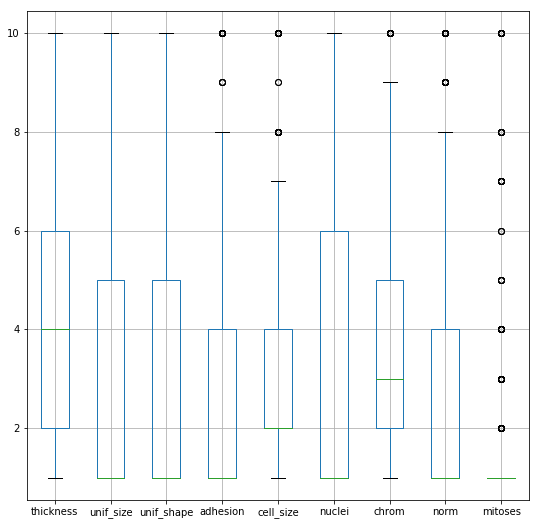

In [48]:
#show a boxplot of the features:

features.boxplot(figsize=(9,9))
plt.show()

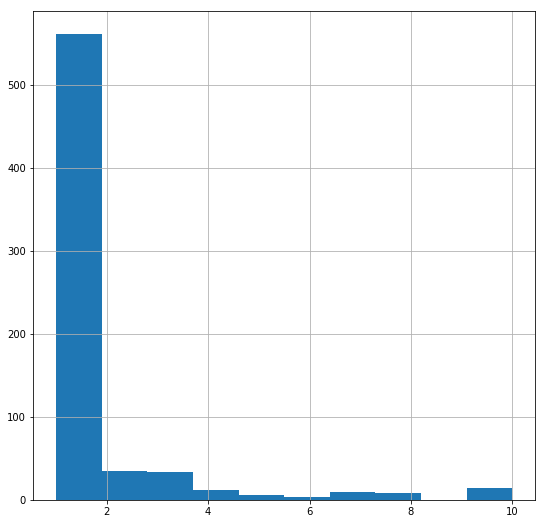

In [49]:
#seems like something's going on with mitoses:

data['mitoses'].hist(figsize=(9,9))
plt.show()

#...interesting

In [54]:
#find the number of outliers:

print(features[(features['mitoses']>2)].shape[0])




85


In [13]:
features.describe().round(0)

,thickness,unif_size,unif_shape,adhesion,cell_size,nuclei,chrom,norm,mitoses
count,682.0,682.0,682.0,682.0,682.0,682.0,682.0,682.0,682.0
mean,4.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,2.0
std,3.0,3.0,3.0,3.0,2.0,4.0,2.0,3.0,2.0
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0
50%,4.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
75%,6.0,5.0,5.0,4.0,4.0,6.0,5.0,4.0,1.0
max,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0


In [14]:
X_train, X_test, y_train, y_test = train_test_split(features, labels,test_size=0.20, random_state=20)

In [16]:
# Apply PCA to reduce features in 3d:

pca = PCA(n_components=3)
pca.fit(features)
reduced_features = pca.transform(features)

/Users/Louis/Documents/ml_projects/artstart/venv/lib/python3.6/site-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


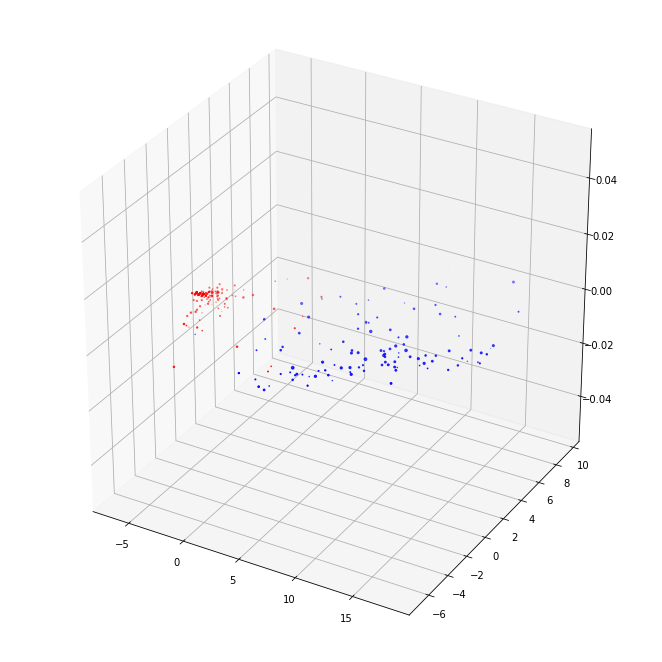

In [50]:
#plot the results:

fig3D = plt.figure(figsize=(9,9))
ax = Axes3D(fig3D)

x=reduced_features[:,0]
y=reduced_features[:,1]
z=reduced_features[:,2]

colors = ['red','blue']
plt.scatter(x,y,z, c=labels, cmap=ListedColormap(colors))
plt.show()

In [25]:
# It seems like the data is easily separated by a plane, we use an SVM to find that plane:

clf=SVC()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
a=accuracy_score(y_pred,y_test)

/Users/Louis/Documents/ml_projects/artstart/venv/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [34]:
print(a.round(2))

0.97
